# Análise das questões levantadas para as disciplinas do P3

#### Importando Bibliotecas

In [1]:
import pandas as pd
from statistics import mean, median, mode, stdev, variance
from os import listdir
from math import modf

In [2]:
import os
import sys
sys.path.append(os.path.abspath("util.py"))

import util
import util_extrator_padroes
import util_gerador_graficos

#### Abrindo Arquivos CSV

In [3]:
discentes = util.retorna_discentes()

disciplinas = util.retorna_componentes_com_semestre()

matriculas_realizadas = util.retorna_matriculas()

matriculas_geral = util.retorna_matriculas()

In [4]:
discentes.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
0,18511024,8.18,1985.1,CONCLUÍDO,1988.2
1,18511029,7.70,1985.1,CONCLUÍDO,1988.2
2,18511030,9.22,1985.1,CONCLUÍDO,1988.2
3,18511033,8.31,1985.1,CONCLUÍDO,1988.2
4,18511035,8.06,1985.1,CONCLUÍDO,1988.2


In [5]:
discentes_depois = util.retorna_discentes_depois(discentes=discentes)

discentes_depois.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
483,10611013,8.36,2006.1,CONCLUÍDO,2010.1
484,10611008,8.82,2006.1,CONCLUÍDO,2009.2
485,10611431,8.28,2006.1,CONCLUÍDO,2008.2
486,10611011,8.77,2006.1,CONCLUÍDO,2009.2
487,10611015,8.49,2006.1,CONCLUÍDO,2010.2


In [6]:
matriculas_discentes = discentes_depois['matricula'].to_list()

matriculas_discentes[:5]

[10611013, 10611008, 10611431, 10611011, 10611015]

In [7]:
disciplinas.head()

,codigo,nome,ch_total,semestre
0,1101101,COMPLEMENTOS EM FISICA GERAL I,30,NaN
1,1101107,ESTRUTURA DA MATÉRIA I,60,NaN
2,1101117,FISICA GERAL I,90,NaN
3,1101118,FISICA GERAL II,90,NaN
4,1101119,FISICA GERAL III,90,NaN


In [8]:
disciplinas.count()

codigo      291
nome        291
ch_total    291
semestre     62
dtype: int64

In [9]:
periodo_rec = 3

In [10]:
disciplinas = disciplinas[disciplinas['semestre'] == periodo_rec]
disciplinas.count()

codigo      10
nome        10
ch_total    10
semestre    10
dtype: int64

In [11]:
codigos_disciplinas = disciplinas['codigo'].to_list()

codigos_disciplinas[:5]

['1103112', '1103232', '1107118', '1107148', '1107182']

In [12]:
matriculas_realizadas.head()

,matricula,periodo_matricula,codigo_componente,descricao,media_final
0,10011003,2000.1,1103114,APROVADO,9.7
1,10011003,2000.1,1107137,APROVADO,10.0
2,10011003,2000.1,1103118,APROVADO,9.8
3,10011003,2000.1,1107136,APROVADO,10.0
4,10011003,2000.1,1101117,APROVADO,10.0


### Filtrando as matrículas nas quais os alunos obtiveram sucesso

In [13]:
matriculas_realizadas.count()

matricula            37767
periodo_matricula    37767
codigo_componente    37767
descricao            37767
media_final          35939
dtype: int64

In [14]:
aux = pd.DataFrame()

In [15]:
aux.empty

True

In [16]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVADO'])

In [17]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'DISPENSADO'])

In [18]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'MATRICULADO'])

In [19]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVEITADO'])

In [20]:
### Tratando disciplinas com mais de um registromatriculas_realizadas = None

matriculas_realizadas = aux

matriculas_realizadas.count()

matricula            33295
periodo_matricula    33295
codigo_componente    33295
descricao            33295
media_final          33256
dtype: int64

### Tratando disciplinas com mais de um registro

Disciplinas que precisam desse tratamento:

* LOGICA APLC A COMPUTACAO e LOGICA APLICADA A COMPUTACAO

* CALCULO NUMERICO (sem nenhuma matricula) e CALCULO NUMERICO e CALCULO NUMERICO

* INTRODUCAO AO PROC DIGITAL DE IMAGENS e INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS

* ARQUITETURA DE COMPUTADORES II e ARQUITETURA DE COMPUTADORES II

* ADM SIST DE INFORMACOES e ADMINISTRACAO DE SISTEMAS DE INFORMACAO

* CONSTRUCAO DE COMPILADORES I e CONSTRUÇÃO DE COMPILADORES I

* REDES DE COMPUTADORES I e REDES DE COMPUTADORES I

* ESTÁGIO SUPERVISIONADO e ESTAGIO SUPERVISIONADO

* FISICA APLICADA A COMPUTACAO I (de 60 creditos e de 90 creditos)

* FISICA APLICADA A COMPUTACAO II (de 60 creditos e de 90 creditos)

* CALCULO I (de 60 creditos e de 90 creditos)

* CALCULO II (de 60 creditos e de 90 creditos)

* CALCULO III (de 60 creditos e de 90 creditos)

* CIRCUITOS (de 60 creditos e de 90 creditos)

* INTRODUCAO A ALGEBRA LINEAR e ALGEBRA LIN GEO ANALITICA 

In [21]:
'''fisica1 = []
fisica1 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO I']['codigo'].to_list()
print(fisica1)

calc1 = []
calc1 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL I']['codigo'].to_list()
print(calc1)'''

'''fisica2 = []
fisica2 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO II']['codigo'].to_list()
print(fisica2)

calc2 = []
calc2 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL II']['codigo'].to_list()
print(calc2)

algebra = []
algebra.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO A ALGEBRA LINEAR']['codigo'].iloc[0])
algebra.append(disciplinas[disciplinas['nome'] == 'ALGEBRA LIN GEO ANALITICA']['codigo'].iloc[0])
print(algebra)

logica = []
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLC A COMPUTACAO']['codigo'].iloc[0])
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLICADA A COMPUTACAO']['codigo'].iloc[0])
print(logica)'''

calc3 = []
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIF  E INTEGRAL III']['codigo'].iloc[0])
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL III']['codigo'].iloc[0])
print(calc3)

cl = []
cl = disciplinas[disciplinas['nome'] == 'CIRCUITOS LOGICOS']['codigo'].to_list()
print(cl)

'''numerico = []
numerico = disciplinas[disciplinas['nome'] == 'CALCULO NUMERICO']['codigo'].to_list()
print(numerico)

pdi = []
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO AO PROC DIGITAL DE IMAGENS']['codigo'].iloc[0])
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS']['codigo'].iloc[0])
print(pdi)'''

'''arq2 = []
arq2 = disciplinas[disciplinas['nome'] == 'ARQUITETURA DE COMPUTADORES II']['codigo'].to_list()
print(arq2)'''

'''redes = []
redes = disciplinas[disciplinas['nome'] == 'REDES DE COMPUTADORES I']['codigo'].to_list()
print(redes)

admsi = []
admsi.append(disciplinas[disciplinas['nome'] == 'ADM SIST DE INFORMACOES']['codigo'].iloc[0])
admsi.append(disciplinas[disciplinas['nome'] == 'ADMINISTRACAO DE SISTEMAS DE INFORMACAO']['codigo'].iloc[0])
print(admsi)

comp = []
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUCAO DE COMPILADORES I']['codigo'].iloc[0])
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUÇÃO DE COMPILADORES I']['codigo'].iloc[0])
print(comp)'''

'''estagio = []
estagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])
estagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])
print(estagio)'''

['1103232', '1103112']
['1107118', '1107182']


"estagio = []\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])\nprint(estagio)"

In [22]:
'''fisica1, matriculas_realizadas = util.mapeia_disciplina(fisica1.copy(), matriculas_realizadas)
calc1, matriculas_realizadas = util.mapeia_disciplina(calc1.copy(), matriculas_realizadas)'''

'''fisica2, matriculas_realizadas = util.mapeia_disciplina(fisica2.copy(), matriculas_realizadas)
calc2, matriculas_realizadas = util.mapeia_disciplina(calc2.copy(), matriculas_realizadas)
algebra, matriculas_realizadas = util.mapeia_disciplina(algebra.copy(), matriculas_realizadas)
logica, matriculas_realizadas = util.mapeia_disciplina(logica.copy(), matriculas_realizadas)'''

calc3_aux, matriculas_realizadas = util.mapeia_disciplina(calc3.copy(), matriculas_realizadas)
cl_aux, matriculas_realizadas = util.mapeia_disciplina(cl.copy(), matriculas_realizadas)

calc3_aux, matriculas_geral = util.mapeia_disciplina(calc3.copy(), matriculas_geral)
cl_aux, matriculas_geral = util.mapeia_disciplina(cl.copy(), matriculas_geral)

'''numerico, matriculas_realizadas = util.mapeia_disciplina(numerico.copy(), matriculas_realizadas)
pdi, matriculas_realizadas = util.mapeia_disciplina(pdi.copy(), matriculas_realizadas)'''

'''arq2, matriculas_realizadas = util.mapeia_disciplina(arq2.copy(), matriculas_realizadas)'''

'''redes, matriculas_realizadas = util.mapeia_disciplina(redes.copy(), matriculas_realizadas)
admsi, matriculas_realizadas = util.mapeia_disciplina(admsi.copy(), matriculas_realizadas)
comp, matriculas_realizadas = util.mapeia_disciplina(comp.copy(), matriculas_realizadas)'''

'''estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'''

Disciplina(s) ['1103112'] mapeadas para o código 1103232
Disciplina(s) ['1107182'] mapeadas para o código 1107118
Disciplina(s) ['1103112'] mapeadas para o código 1103232
Disciplina(s) ['1107182'] mapeadas para o código 1107118


'estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'

### Disciplinas que serão analisadas

In [23]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])
    
codigos_disciplinas.remove('1103112')
codigos_disciplinas.remove('1107182')
codigos_disciplinas.remove('1107190')

1103112
CALCULO DIFERENCIAL E INTEGRAL III
1103232
CALCULO DIF  E INTEGRAL III
1107118
CIRCUITOS LOGICOS
1107148
LINGUAGEM PROGRAMACAO II
1107182
CIRCUITOS LOGICOS
1107186
ESTRUTURA DE DADOS
1107190
IINTRODUÇÃO A COMPUTAÇÃO GRÁFICA
1107190
IINTRODUÇÃO A COMPUTAÇÃO GRÁFICA
1107206
PESQUISA APLICADA A COMPUTACAO
1107212
TEORIA DA COMPUTACAO


In [24]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])

1103232
CALCULO DIF  E INTEGRAL III
1107118
CIRCUITOS LOGICOS
1107148
LINGUAGEM PROGRAMACAO II
1107186
ESTRUTURA DE DADOS
1107190
IINTRODUÇÃO A COMPUTAÇÃO GRÁFICA
1107206
PESQUISA APLICADA A COMPUTACAO
1107212
TEORIA DA COMPUTACAO


### Gerando relatório

In [25]:
relatorio = []

for codigo in codigos_disciplinas:
    
    relatorio_disciplina = {'nome': None, 'rec': None, 'nao_rec': None, 'alunos_nao_rec': []}

    aux = matriculas_realizadas[matriculas_realizadas['codigo_componente'] == codigo]

    disciplina = disciplinas[disciplinas['codigo'] == codigo]['nome'].iloc[0]

    #periodo_recomendado = int(disciplinas[disciplinas['codigo'] == codigo]['semestre'].iloc[0])

    relatorio_disciplina['nome'] = disciplina

    matriculas = aux.count().iloc[0]
        
    #matriculas = 1

    rec = 0
    nao_rec = 0
    
    alunos_nao_rec = []

    for row in aux.iterrows():

        #print(row[1])
        #print()

        aluno = row[1]['matricula']

        if aluno not in matriculas_discentes:
            matriculas -= 1
            continue

        else:
                
            periodo_matricula = row[1]['periodo_matricula']
            periodo_ingresso = discentes_depois[discentes_depois['matricula'] == aluno]['periodo_ingresso'].iloc[0]

            periodo_cursou = util.retorna_tempo_graduacao(periodo_ingresso, periodo_matricula)

            #print('rec: {} matri: {} ingre: {} cursou: {}'.format(periodo_recomendado, periodo_matricula, periodo_ingresso, periodo_cursou))

            if periodo_cursou == periodo_rec:
                rec += 1

            else:
                nao_rec += 1
                alunos_nao_rec.append(aluno)
                    
            #matriculas += 1

    
    relatorio_disciplina['rec'] = rec/matriculas
    relatorio_disciplina['nao_rec'] = nao_rec/matriculas
    relatorio_disciplina['alunos_nao_rec'] = alunos_nao_rec
    print(matriculas)
    
    relatorio.append(relatorio_disciplina)

219
219
219
217
217
217
217


In [26]:
relatorio

[{'nome': 'CALCULO DIF  E INTEGRAL III',
  'rec': 0.3789954337899543,
  'nao_rec': 0.6210045662100456,
  'alunos_nao_rec': [10611015,
   10611023,
   10611029,
   10621014,
   10621015,
   10621017,
   10621020,
   10621022,
   10621028,
   10621030,
   10621239,
   10621243,
   10621363,
   10621364,
   10711005,
   10711011,
   10711012,
   10711018,
   10711029,
   10711032,
   10711466,
   10711469,
   10721015,
   10811031,
   10821057,
   10821063,
   10821251,
   10821361,
   10911054,
   10911653,
   10921054,
   10921056,
   10921059,
   10921063,
   10921069,
   10921072,
   10921073,
   10921360,
   10921363,
   10921372,
   10921378,
   11011060,
   11011062,
   11011065,
   11011068,
   11011089,
   11011829,
   11011830,
   11011833,
   11011836,
   11021057,
   11021059,
   11021063,
   11021067,
   11021068,
   11021445,
   11021452,
   11021593,
   11021633,
   11111298,
   11111309,
   11111314,
   11111316,
   11111322,
   11118146,
   11118199,
   11118203,
   11118

### Analisando CALCULO III

In [27]:
codigo = codigos_disciplinas[0]

In [28]:
print(relatorio[0]['nome'])

alunos_nao_rec = relatorio[0]['alunos_nao_rec']

alunos_nao_rec

CALCULO DIF  E INTEGRAL III


[10611015,
 10611023,
 10611029,
 10621014,
 10621015,
 10621017,
 10621020,
 10621022,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10711005,
 10711011,
 10711012,
 10711018,
 10711029,
 10711032,
 10711466,
 10711469,
 10721015,
 10811031,
 10821057,
 10821063,
 10821251,
 10821361,
 10911054,
 10911653,
 10921054,
 10921056,
 10921059,
 10921063,
 10921069,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921378,
 11011060,
 11011062,
 11011065,
 11011068,
 11011089,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021063,
 11021067,
 11021068,
 11021445,
 11021452,
 11021593,
 11021633,
 11111298,
 11111309,
 11111314,
 11111316,
 11111322,
 11118146,
 11118199,
 11118203,
 11118204,
 11118209,
 11121191,
 11121212,
 11121216,
 11121217,
 11121219,
 11121220,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211410,
 11211414,
 11211416,
 11211422,
 11211425,
 11218275,
 11218562,
 11218638,

In [29]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11208   10611015             2009.2           1103232  APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
493   10611023  8.25            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
11391   10611023             2007.1           1103232  REPROVADO          4.3
11396   10611023             2007.2           1103232   APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
492   10611029  8.05            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
11541   10611029             2007.1           1103232  REPROVADO          4.3
11551   10611029             2007.2     

       matricula  periodo_matricula codigo_componente  descricao  media_final
15038   10911054             2010.2           1103232  REPROVADO          1.5
15043   10911054             2011.1           1103232   APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
563   10911653  6.68            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
15321   10911653             2011.1           1103232   TRANCADO          NaN
15336   10911653             2012.1           1103232  REPROVADO          3.2
15340   10911653             2012.2           1103232   APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
567   10921054  7.97            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
15370   10921054             2010.2           1103232  REPROVADO          3.0
15374   10921054    

       matricula  periodo_matricula codigo_componente descricao  media_final
17939   11021445             2012.1           1103232  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
600   11021452  8.38            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18000   11021452             2012.1           1103232  TRANCADO          NaN
18004   11021452             2012.2           1103232  APROVADO          7.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
606   11021593  4.94            2010.2  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
18082   11021593             2014.2           1103232  REPROVADO          0.3
18085   11021593             2015.1           1103232  REPROVADO          0.0
18094   11021593             2015.2           1103232   APROVADO          5.0

     matricula   cra  pe

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
634   11121705  6.27            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20072   11121705             2013.1           1103232    TRANCADO          NaN
20085   11121705             2014.1           1103232   REPROVADO          0.3
20090   11121705             2014.2           1103232    TRANCADO          NaN
20094   11121705             2015.1           1103232   REPROVADO          0.0
20105   11121705             2015.2           1103232    EXCLUIDA          NaN
20111   11121705             2015.2           1103232  INDEFERIDO          NaN
20112   11121705             2015.2           1103232    APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
639   11121911  5.59            2011.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20154   111219

       matricula  periodo_matricula codigo_componente   descricao  media_final
22098   11311009             2014.1           1103232  REP. FALTA          0.0
22106   11311009             2014.2           1103232    APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
672   11311014  7.57            2013.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22168   11311014             2014.2           1103232  APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
673   11318739  7.54            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22501   11318739             2014.2           1103232   REPROVADO          3.2
22512   11318739             2015.2           1103232  INDEFERIDO          NaN
22517   11318739             2015.2           1103232    APROVADO          7.0
22518   1131873

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
678   11318705  7.79            2013.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22424   11318705             2013.1           1103232  DISPENSADO          5.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
679   11321685  7.59            2013.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
22635   11321685             2013.2           1103232  DISPENSADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
680   11328180  7.75            2013.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22681   11328180             2013.2           1103232  DISPENSADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
687   11403755  7.46            2014.1  

In [30]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [31]:
aux

[0.19117647058823528,
 0.022058823529411766,
 0.0,
 0.375,
 0.08823529411764706,
 0.0661764705882353,
 0.029411764705882353,
 0.0661764705882353,
 0.09558823529411764,
 0.022058823529411766,
 0.029411764705882353,
 0.0,
 0.014705882352941176]

In [32]:
sum(aux)

1.0

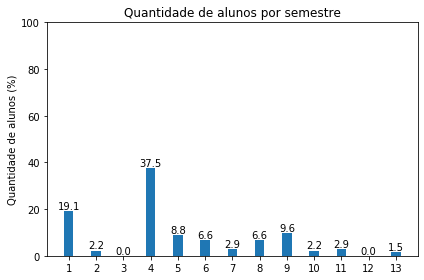

In [33]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [34]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [35]:
aux

{'APROVADO': 0.3161764705882353,
 'REPROVADO': 0.2426470588235294,
 'TRANCADO': 0.19852941176470587,
 'REP. FALTA': 0.04411764705882353,
 'INDEFERIDO': 0.007352941176470588,
 'EXCLUIDA': 0.007352941176470588,
 'DISPENSADO': 0.18382352941176472}

### Analisando LP II

In [36]:
codigo = codigos_disciplinas[1]

In [37]:
print(relatorio[1]['nome'])

alunos_nao_rec = relatorio[1]['alunos_nao_rec']

alunos_nao_rec

CIRCUITOS LOGICOS


[10611015,
 10611431,
 10621020,
 10711005,
 10711011,
 10711021,
 10711027,
 10711029,
 10711032,
 10711469,
 10721015,
 10721026,
 10721244,
 10811031,
 10821055,
 10821060,
 10821063,
 10821251,
 10821361,
 10921372,
 11011065,
 11011835,
 11111298,
 11111309,
 11111316,
 11111322,
 11118146,
 11118199,
 11118202,
 11118203,
 11118204,
 11118209,
 11121911,
 11121912,
 11128089,
 11218638,
 11218640,
 11218649,
 11218797,
 11221998,
 11228207,
 11311009,
 11311014,
 11512971,
 11514334,
 10621235,
 10721006,
 10911646,
 11011091,
 11021645,
 11111299,
 11121218,
 11211054,
 11211413,
 11218275,
 11221262,
 11228204,
 11318705,
 11321685,
 11328180,
 11403755,
 11403784,
 11409514,
 11427671,
 11500552,
 11508347,
 11508370,
 11511184]

In [38]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11187   10611015             2008.1           1107118  APROVADO         7.13

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
485   10611431  8.28            2006.1  CONCLUÍDO             2008.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11583   10611431             2006.1           1107118  APROVADO         7.25

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12138   10621020             2007.2           1107118  TRANCADO          NaN
12144   10621020             2008.1           1107118  APROVADO         6.25

     matricula   cra  periodo_ingresso  desc

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
618   11118204  4.76            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19144   11118204             2012.1           1107118    TRANCADO          NaN
19150   11118204             2012.2           1107118  REP. FALTA         0.00
19154   11118204             2013.1           1107118  REP. FALTA         0.00
19166   11118204             2013.2           1107118    APROVADO         5.33

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
622   11118209  6.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19293   11118209             2012.1           1107118  REP. FALTA         0.00
19304   11118209             2012.2           1107118    APROVADO         5.32

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
639   11121911  5.59   

       matricula  periodo_matricula codigo_componente   descricao  media_final
22682   11328180             2013.2           1107118  DISPENSADO          5.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
687   11403755  7.46            2014.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22972   11403755             2014.1           1107118  DISPENSADO         6.38

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
683   11403784  7.3            2014.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
23095   11403784             2014.1           1107118  DISPENSADO         6.75

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
685   11409514  7.74            2014.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
23353   11409514             201

In [39]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [40]:
aux

[0.36764705882352944,
 0.08823529411764706,
 0.0,
 0.3235294117647059,
 0.10294117647058823,
 0.058823529411764705,
 0.058823529411764705]

In [41]:
sum(aux)

1.0

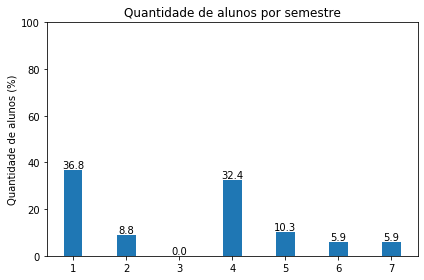

In [42]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [43]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [44]:
aux

{'APROVADO': 0.47058823529411764,
 'TRANCADO': 0.10294117647058823,
 'REP. FALTA': 0.04411764705882353,
 'EXCLUIDA': 0.029411764705882353,
 'REPROVADO': 0.014705882352941176,
 'DISPENSADO': 0.3382352941176471}

### Analisando CIRCUITOS LOGICOS

In [45]:
codigo = codigos_disciplinas[2]

In [46]:
print(relatorio[2]['nome'])

alunos_nao_rec = relatorio[2]['alunos_nao_rec']

alunos_nao_rec

LINGUAGEM PROGRAMACAO II


[10611026,
 10611431,
 10611437,
 10611440,
 10621028,
 10621239,
 10621243,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711469,
 10721015,
 10721026,
 10721244,
 10811031,
 10811041,
 10811057,
 10811434,
 10811443,
 10821063,
 10911036,
 10911040,
 10911042,
 10911044,
 10911068,
 10911075,
 10911649,
 10911653,
 10921054,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921373,
 10921378,
 10921379,
 11011057,
 11011061,
 11011065,
 11011068,
 11011087,
 11011089,
 11011827,
 11011828,
 11011829,
 11011835,
 11011836,
 11021057,
 11021059,
 11021067,
 11021068,
 11021445,
 11021593,
 11111298,
 11111309,
 11118146,
 11118199,
 11118204,
 11118207,
 11118209,
 11121191,
 11121212,
 11121217,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211410,
 11211425,
 11218354,
 11218562,
 11218638,
 11218640,
 11218649,
 11218797,
 11218799,
 11221240,

In [47]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
499   10611026  8.43            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11438   10611026             2007.1           1107148  TRANCADO          NaN
11444   10611026             2007.2           1107148  APROVADO          6.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
485   10611431  8.28            2006.1  CONCLUÍDO             2008.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11581   10611431             2006.1           1107148  APROVADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
498   10611437  8.55            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11698   10611437             2007.2           1107148  APROVADO          5.5

     matricula   cra  periodo_ingresso  desc

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
557   10911042  7.8            2009.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14929   10911042             2010.2           1107148  APROVADO          6.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
560   10911044  8.38            2009.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14983   10911044             2010.2           1107148  APROVADO          7.1

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
558   10911068  7.9            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15097   10911068             2010.2           1107148  APROVADO          6.4

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
562   10911075  8.7            2009.1  CONCLUÍDO         

       matricula  periodo_matricula codigo_componente descricao  media_final
17001   11011829             2011.1           1107148  TRANCADO          NaN
17012   11011829             2011.2           1107148  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
584   11011835  7.14            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
17174   11011835             2011.1           1107148  REPROVADO          2.6
17176   11011835             2011.2           1107148   APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
585   11011836  7.35            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17224   11011836             2011.1           1107148  TRANCADO          NaN
17231   11011836             2011.2           1107148  APROVADO          7.3

     matricula   cra  per

     matricula   cra  periodo_ingresso         descricao  periodo_conclusao
646   11218354  8.02            2012.1  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
20970   11218354             2013.1           1107148  REPROVADO          4.2
20973   11218354             2013.2           1107148   EXCLUIDA          NaN
20999   11218354             2017.1           1107148   APROVADO          5.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
657   11218562  7.28            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
21034   11218562             2013.1           1107148   REPROVADO          1.6
21038   11218562             2013.2           1107148   REPROVADO          4.6
21044   11218562             2015.2           1107148    APROVADO          9.2
21051   11218562             2015.2           1107148  INDEFERIDO          NaN

 

       matricula  periodo_matricula codigo_componente   descricao  media_final
16837   11011091             2010.1           1107148  DISPENSADO          5.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
602   11021645  8.59            2010.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18246   11021645             2010.2           1107148  DISPENSADO          7.9

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
616   11111299  8.4            2011.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18432   11111299             2011.2           1107148  DISPENSADO          5.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
625   11111322  4.77            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
18764   11111322             201

In [48]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [49]:
aux

[0.1796875,
 0.0546875,
 0.0,
 0.4296875,
 0.1875,
 0.0703125,
 0.0234375,
 0.0390625,
 0.0,
 0.0078125,
 0.0078125]

In [50]:
sum(aux)

1.0

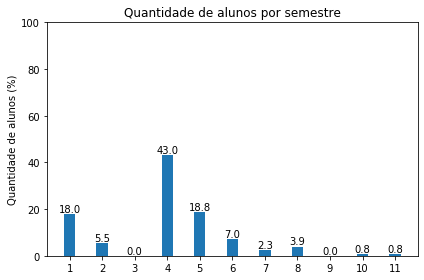

In [51]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [52]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [53]:
aux

{'TRANCADO': 0.1328125,
 'APROVADO': 0.4375,
 'REPROVADO': 0.2109375,
 'EXCLUIDA': 0.0078125,
 'REP. FALTA': 0.015625,
 'INDEFERIDO': 0.0234375,
 'DISPENSADO': 0.171875}

### Analisando ED

In [54]:
codigo = codigos_disciplinas[3]

In [55]:
print(relatorio[3]['nome'])

alunos_nao_rec = relatorio[3]['alunos_nao_rec']

alunos_nao_rec

ESTRUTURA DE DADOS


[10611440,
 10621015,
 10621020,
 10621028,
 10621239,
 10711005,
 10711013,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711467,
 10711469,
 10721006,
 10721015,
 10811031,
 10821063,
 10821251,
 10911054,
 10911649,
 10911653,
 10921054,
 10921063,
 10921072,
 10921360,
 10921372,
 10921378,
 11011065,
 11011068,
 11011073,
 11011836,
 11021057,
 11021059,
 11021063,
 11021067,
 11021068,
 11021445,
 11021593,
 11021633,
 11111298,
 11118146,
 11118199,
 11118204,
 11118209,
 11121191,
 11121216,
 11121217,
 11121219,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,
 11121912,
 11121914,
 11211414,
 11211425,
 11218562,
 11218638,
 11218640,
 11218649,
 11218799,
 11221240,
 11221826,
 11221998,
 11228204,
 11318739,
 11427671,
 11511184,
 11514334,
 10621363,
 10721026,
 10911646,
 11011087,
 11011091,
 11021645,
 11111299,
 11111309,
 11121218,
 11211054,
 11211413,
 11218275,
 11221262,
 11318705,
 11321685,
 11328180,
 11403755,
 11403784,
 11409514,
 11500552,

In [56]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
11798   10611440             2007.2           1107186  REPROVADO         2.40
11803   10611440             2008.1           1107186   APROVADO         5.15

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
11969   10621015             2007.2           1107186  REPROVADO         3.40
11977   10621015             2008.1           1107186   APROVADO         6.24

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
12135   10621020             2007.2  

       matricula  periodo_matricula codigo_componente descricao  media_final
15766   10921072             2011.1           1107186  APROVADO         5.29

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
565   10921360  6.23            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
15884   10921360             2011.2           1107186  REPROVADO         2.41
15886   10921360             2012.1           1107186  REPROVADO         4.00
15899   10921360             2012.2           1107186   APROVADO         5.70

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
576   10921372  8.01            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16015   10921372             2012.1           1107186  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
577   10921378  6.73            

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
634   11121705  6.27            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20078   11121705             2013.2           1107186  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
639   11121911  5.59            2011.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20152   11121911             2013.2           1107186  APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
632   11121912  6.34            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20232   11121912             2013.1           1107186  REP. FALTA          0.0
20238   11121912             2013.2           1107186    APROVADO          7.3

     matricula   cra  periodo_ingresso

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
617   11111309  8.62            2011.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18529   11111309             2013.2           1107186  DISPENSADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
641   11121218  7.57            2011.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
19684   11121218             2011.2           1107186  DISPENSADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
662   11211054  7.39            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20483   11211054             2012.1           1107186  DISPENSADO          7.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
663   11211413  8.09            2012.1  

In [57]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [58]:
aux

[0.22340425531914893,
 0.07446808510638298,
 0.0,
 0.3723404255319149,
 0.2127659574468085,
 0.05319148936170213,
 0.02127659574468085,
 0.0425531914893617]

In [59]:
sum(aux)

1.0

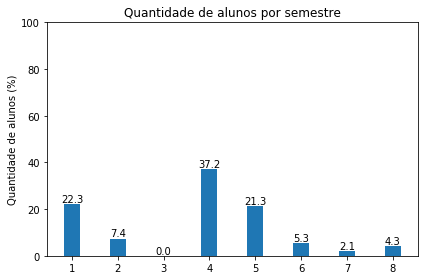

In [60]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [61]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [62]:
aux

{'REPROVADO': 0.35106382978723405,
 'REP. FALTA': 0.0425531914893617,
 'APROVADO': 0.30851063829787234,
 'TRANCADO': 0.05319148936170213,
 'DISPENSADO': 0.24468085106382978}

### Analisando CG

In [63]:
codigo = codigos_disciplinas[4]

In [64]:
print(relatorio[4]['nome'])

alunos_nao_rec = relatorio[4]['alunos_nao_rec']

alunos_nao_rec

IINTRODUÇÃO A COMPUTAÇÃO GRÁFICA


[10611440,
 10621015,
 10621017,
 10621018,
 10621020,
 10621028,
 10621030,
 10621243,
 10621363,
 10621367,
 10711005,
 10711018,
 10711021,
 10711027,
 10711028,
 10711029,
 10711032,
 10711467,
 10711469,
 10721006,
 10721015,
 10721026,
 10721244,
 10811031,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911042,
 10911054,
 10911649,
 10911653,
 10921063,
 10921072,
 10921360,
 10921363,
 10921372,
 10921378,
 11011060,
 11011065,
 11011068,
 11011087,
 11011089,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021068,
 11021069,
 11021072,
 11021432,
 11021439,
 11021445,
 11021452,
 11021593,
 11021633,
 11021635,
 11021645,
 11111298,
 11111314,
 11111316,
 11118146,
 11118199,
 11118203,
 11118204,
 11118207,
 11118209,
 11121191,
 11121212,
 11121216,
 11121217,
 11121219,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211410,
 11211414,

In [65]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
11799   10611440             2007.2           1107190   TRANCADO          NaN
11804   10611440             2008.1           1107190  REPROVADO          3.5
11810   10611440             2008.2           1107190   APROVADO          7.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11984   10621015             2008.2           1107190  APROVADO          5.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
501   10621017  8.05            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12037   10621017             2008.1      

       matricula  periodo_matricula codigo_componente descricao  media_final
13943   10811031             2011.1           1107190  APROVADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
552   10821055  7.68            2008.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
14426   10821055             2011.1           1107190  REPROVADO         4.25
14436   10821055             2012.1           1107190   APROVADO         8.10

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
547   10821057  8.04            2008.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14467   10821057             2009.2           1107190  TRANCADO          NaN
14473   10821057             2010.1           1107190  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
551   10821060  8.03            2

       matricula  periodo_matricula codigo_componente   descricao  media_final
17303   11021057             2013.2           1107190  REP. FALTA          0.0
17310   11021057             2014.1           1107190    APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
609   11021059  6.98            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
17380   11021059             2014.2           1107190  REPROVADO         4.12
17389   11021059             2015.1           1107190   APROVADO         7.30

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
598   11021060  7.98            2010.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17409   11021060             2011.2           1107190  TRANCADO          NaN
17433   11021060             2013.2           1107190  APROVADO         7.06

     matricula   cr

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
618   11118204  4.76            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19210   11118204             2016.2           1107190  INDEFERIDO          NaN
19217   11118204             2016.2           1107190    APROVADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
630   11118207  8.53            2011.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
19258   11118207             2013.2           1107190  APROVADO         7.33

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
622   11118209  6.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
19302   11118209             2012.2           1107190  REPROVADO         1.10
19313   11118209             2013.2    

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
655   11218275  5.32            2012.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20942   11218275             2016.1           1107190    APROVADO          9.7
20947   11218275             2016.1           1107190  INDEFERIDO          NaN

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
657   11218562  7.28            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
21063   11218562             2016.2           1107190    APROVADO          8.1
21070   11218562             2016.2           1107190  INDEFERIDO          NaN

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
651   11218638  8.75            2012.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21110   11218638             2013

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
699   11511184  7.1            2015.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
23827   11511184             2015.1           1107190  APROVADO          5.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
696   11512971  7.98            2015.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
23911   11512971             2016.2           1107190  APROVADO          6.0

     matricula   cra  periodo_ingresso         descricao  periodo_conclusao
702   11514334  8.49            2015.2  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente descricao  media_final
23963   11514334             2016.1           1107190  APROVADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
559   10911646  7.64            2009.1  

In [66]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [67]:
aux

[0.13533834586466165,
 0.022556390977443608,
 0.0,
 0.21804511278195488,
 0.13533834586466165,
 0.09022556390977443,
 0.14285714285714285,
 0.07518796992481203,
 0.09022556390977443,
 0.05263157894736842,
 0.022556390977443608,
 0.007518796992481203,
 0.007518796992481203]

In [68]:
sum(aux)

1.0

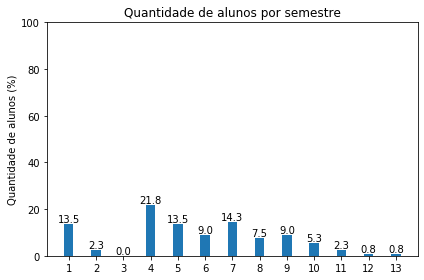

In [69]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [70]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [71]:
aux

{'TRANCADO': 0.13533834586466165,
 'APROVADO': 0.39097744360902253,
 'REPROVADO': 0.3082706766917293,
 'REP. FALTA': 0.03759398496240601,
 'INDEFERIDO': 0.015037593984962405,
 'EXCLUIDA': 0.022556390977443608,
 'DISPENSADO': 0.09022556390977443}

### Analisando PESQUISA

In [72]:
codigo = codigos_disciplinas[5]

In [73]:
print(relatorio[5]['nome'])

alunos_nao_rec = relatorio[5]['alunos_nao_rec']

alunos_nao_rec

PESQUISA APLICADA A COMPUTACAO


[10611015,
 10611437,
 10621014,
 10621015,
 10621020,
 10621022,
 10621030,
 10621243,
 10621364,
 10621367,
 10711005,
 10711021,
 10711027,
 10711032,
 10711467,
 10711469,
 10721006,
 10721015,
 10721026,
 10721244,
 10811031,
 10811037,
 10811041,
 10811057,
 10811434,
 10811443,
 10821055,
 10821060,
 10821063,
 10821251,
 10821361,
 10911054,
 10921064,
 10921071,
 10921372,
 10921373,
 10921379,
 11011053,
 11011057,
 11011061,
 11011065,
 11011087,
 11011827,
 11011835,
 11011836,
 11021068,
 11111309,
 11111314,
 11111322,
 11118146,
 11121191,
 11121216,
 11121217,
 11121219,
 11121220,
 11121223,
 11121911,
 11121912,
 11121914,
 11128089,
 11211410,
 11211425,
 11218354,
 11218638,
 11218640,
 11218649,
 11218788,
 11218797,
 11218799,
 11221998,
 11228207,
 11311009,
 11311018,
 11311469,
 11328275,
 11328386,
 11500983,
 11511184,
 11514334,
 10621018,
 10621363,
 10911646,
 11011091,
 11021645,
 11111299,
 11121218,
 11211054,
 11211413,
 11218275,
 11221262,
 11228204,

In [74]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11212   10611015             2010.1           1107206  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
498   10611437  8.55            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11720   10611437             2009.2           1107206  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
505   10621014  7.83            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11914   10621014             2007.1           1107206  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO   


     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
551   10821060  8.03            2008.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14534   10821060             2010.2           1107206  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
550   10821063  6.55            2008.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14585   10821063             2010.2           1107206  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
553   10821251  6.49            2008.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14651   10821251             2010.1           1107206  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
548   10821361  8.16            2008.2  CONCLUÍDO  

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
632   11121912  6.34            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20246   11121912             2014.1           1107206  APROVADO          8.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
640   11121914  6.04            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20294   11121914             2012.1           1107206  TRANCADO          NaN
20303   11121914             2013.1           1107206  APROVADO          9.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
636   11128089  5.35            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20382   11128089             2011.2           1107206  APROVADO          7.0

     matricula  cra  periodo_ingresso  descr

       matricula  periodo_matricula codigo_componente   descricao  media_final
18434   11111299             2011.2           1107206  DISPENSADO         8.14

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
641   11121218  7.57            2011.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
19653   11121218             2011.2           1107206  DISPENSADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
662   11211054  7.39            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20470   11211054             2012.1           1107206  DISPENSADO          8.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
663   11211413  8.09            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20599   11211413             2

In [75]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [76]:
aux

[0.27450980392156865,
 0.14705882352941177,
 0.0,
 0.30392156862745096,
 0.08823529411764706,
 0.058823529411764705,
 0.029411764705882353,
 0.029411764705882353,
 0.0196078431372549,
 0.029411764705882353,
 0.00980392156862745,
 0.00980392156862745]

In [77]:
sum(aux)

1.0000000000000002

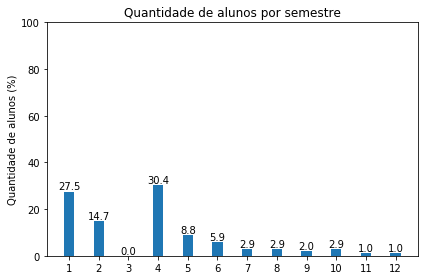

In [78]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [79]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [80]:
aux

{'APROVADO': 0.6568627450980392,
 'REP. FALTA': 0.058823529411764705,
 'TRANCADO': 0.0392156862745098,
 'REPROVADO': 0.0196078431372549,
 'DISPENSADO': 0.22549019607843138}

In [81]:
sum(aux.values())

1.0

### Analisando TEORIA DA COMPUTACAO

In [82]:
codigo = codigos_disciplinas[6]

In [83]:
print(relatorio[6]['nome'])

alunos_nao_rec = relatorio[6]['alunos_nao_rec']

alunos_nao_rec

TEORIA DA COMPUTACAO


[10611004,
 10611011,
 10611013,
 10611014,
 10611015,
 10611022,
 10611026,
 10611029,
 10611434,
 10611440,
 10711005,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711469,
 10721006,
 10721015,
 10721022,
 10721026,
 10811031,
 10821063,
 10921063,
 10921360,
 10921372,
 11011065,
 11011087,
 11011089,
 11011835,
 11021068,
 11111309,
 11118146,
 11118199,
 11118204,
 11121216,
 11121705,
 11121911,
 11128089,
 11218638,
 11218649,
 11218788,
 11218797,
 11218799,
 11221998,
 11228207,
 11311014,
 11311862,
 11427671,
 11500983,
 11512971,
 11514334,
 10911646,
 11011091,
 11021645,
 11111299,
 11111322,
 11121218,
 11211054,
 11211413,
 11218275,
 11221262,
 11228204,
 11318705,
 11321685,
 11328180,
 11403755,
 11403784,
 11409514,
 11500552,
 11508347,
 11508370,
 11511184]

In [84]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
500   10611004  8.57            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
10929   10611004             2007.2           1107212  APROVADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
486   10611011  8.77            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11030   10611011             2007.2           1107212  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
483   10611013  8.36            2006.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11083   10611013             2007.2           1107212  APROVADO          8.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
497   10611014  8.67            2006.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
18866   11118146             2012.2           1107212  APROVADO          9.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
623   11118199  4.76            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18930   11118199             2012.2           1107212  APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
618   11118204  4.76            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19151   11118204             2012.2           1107212  APROVADO          6.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
635   11121216  6.48            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19518   11121216             2013.2         

       matricula  periodo_matricula codigo_componente   descricao  media_final
20601   11211413             2012.1           1107212  DISPENSADO         8.42

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
655   11218275  5.32            2012.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20898   11218275             2012.1           1107212  DISPENSADO          8.8

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
664   11221262  7.9            2012.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
21691   11221262             2012.2           1107212  DISPENSADO          9.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
669   11228204  5.73            2012.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
21908   11228204             201

In [85]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [86]:
aux

[0.3150684931506849,
 0.1506849315068493,
 0.0,
 0.3150684931506849,
 0.1095890410958904,
 0.0547945205479452,
 0.0136986301369863,
 0.0273972602739726,
 0.0136986301369863]

In [87]:
sum(aux)

1.0

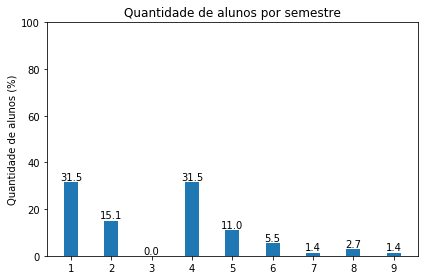

In [88]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [89]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [90]:
aux

{'APROVADO': 0.5753424657534246,
 'TRANCADO': 0.0547945205479452,
 'REP. FALTA': 0.0273972602739726,
 'REPROVADO': 0.0547945205479452,
 'DISPENSADO': 0.2876712328767123}

In [91]:
sum(aux.values())

1.0